In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [46]:
kpg = pd.ExcelFile("KPMG_VI_New_raw_data_update_final (3).xlsx")
df = pd.read_excel(kpg, sheet_name=3, header=1)

In [47]:
df.head(n=2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [27]:
# check for null values
def check_NA():
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret
NaNlist = check_NA()
print(NaNlist, len(NaNlist))
# for col
check = []
k = -1
for i in NaNlist:
    k+=1
    if i>0:
        check.append(k)
# check Unique
def check_unique():
    mydict ={}
    temp = list(df)
    for i in range(3,13):
        c = 0
        if NaNlist[i] > 0:
            c = len(df[temp[i]].unique()) - 1
        else:
            c = len(df[temp[i]].unique())
        mydict[temp[i]] = (c, df[temp[i]].unique())
    return mydict
        

[0, 0, 125, 0, 0, 87, 506, 656, 0, 0, 302, 0, 87] 13


In [30]:
#first is Female, second if Male, third is Unknown
gender = [0,0,0]
for each in df['gender']:
    if each[0] =='F':
        gender[0] += 1
    elif each[0] == 'M':
        gender[1] += 1
    else:
        gender[2] += 1
print(gender)
   

[2039, 1873, 88]


In [48]:
#Analyze the Gender vs Bikes bought
def gf(x,pos):
    return int(x)
bike = [0,0,0]
bike[0] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'F'].sum()
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum() + df['past_3_years_bike_related_purchases'][df['gender'] == 'M'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

([<matplotlib.axis.XTick at 0x222d1479c30>,
 [Text(0, 0, 'Female'),
  Text(1, 0, "F's P"),
  Text(2, 0, 'Male'),
  Text(3, 0, "M's P"),
  Text(4, 0, 'Unknown'),
  Text(5, 0, "U's P")])

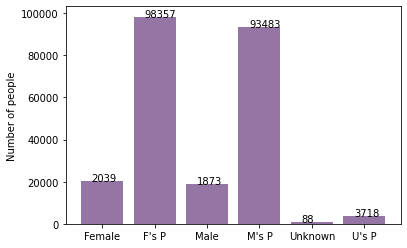

In [52]:
grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.2, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x222d63600d0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male'), Text(2, 0, 'Unknown')])

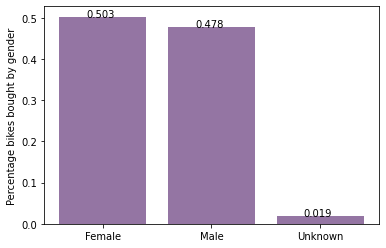

In [53]:
# Percentage bikes bought by gender
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [56]:
#Analyze on the age vs bikes bought
#Needs to transform
print(df["DOB"][1].ctime().split(" ")[4])
df["Age"] = 0
lenn = len(df["DOB"])
k    = 0
for i in range(1, lenn):
    #type is date
    if isinstance(df["DOB"][i], datetime.date):
        tl = len(df["DOB"][i].ctime().split(" "))
        df["Age"][i] += int(2019 - int(df["DOB"][i].ctime().split(" ")[tl-1]))
    #type is string
    elif isinstance(df["DOB"][i], str):
        tl = len(df["DOB"][i].split("-"))
        df["Age"][i] += int(2019 - int(df["DOB"][i].split("-")[tl-1])) 
    #time is float: means it's nan value so do nothing
print(k)

1980


ValueError: NaTType does not support ctime

KeyError: 4000